In [2]:
# Load dependencies
import pandas as pd 
import numpy as np 
import plotly.express as px
import seaborn as sns
%matplotlib inline
import ydata_profiling as pdp
import matplotlib.pyplot as plt 
import PyQt6

c:\Users\DELL G3\miniconda3\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
#Loading and showing head data
df = pd.read_csv('flight_data.csv', index_col=0)
df.head(5)

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0


In [4]:
df

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336772,2013,9,30,NaN,NaN,NaN,NaN,9E,NaN,3393,JFK,DCA,NaN,213,NaN,NaN
336773,2013,9,30,NaN,NaN,NaN,NaN,9E,NaN,3525,LGA,SYR,NaN,198,NaN,NaN
336774,2013,9,30,NaN,NaN,NaN,NaN,MQ,N535MQ,3461,LGA,BNA,NaN,764,NaN,NaN
336775,2013,9,30,NaN,NaN,NaN,NaN,MQ,N511MQ,3572,LGA,CLE,NaN,419,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 336776 entries, 1 to 336776
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       336776 non-null  int64  
 1   month      336776 non-null  int64  
 2   day        336776 non-null  int64  
 3   dep_time   328521 non-null  float64
 4   dep_delay  328521 non-null  float64
 5   arr_time   328063 non-null  float64
 6   arr_delay  327346 non-null  float64
 7   carrier    336776 non-null  object 
 8   tailnum    334264 non-null  object 
 9   flight     336776 non-null  int64  
 10  origin     336776 non-null  object 
 11  dest       336776 non-null  object 
 12  air_time   327346 non-null  float64
 13  distance   336776 non-null  int64  
 14  hour       328521 non-null  float64
 15  minute     328521 non-null  float64
dtypes: float64(7), int64(5), object(4)
memory usage: 43.7+ MB


In [6]:
df['dep_time'] = df.dep_time[~df.dep_time.isna()].astype(np.int64).apply('{:0>4}'.format)
df['dep_time'] = pd.to_timedelta(df.dep_time.str[:2]+':'+df.dep_time.str[2:]+':00')



df['arr_time'] = df.arr_time[~df.arr_time.isna()].astype(np.int64).apply('{:0>4}'.format)
df['arr_time'] = pd.to_timedelta(df.arr_time.str[:2]+':'+df.arr_time.str[2:]+':00')


df[['dep_time' , 'arr_time', ]] = df[['dep_time', 'arr_time', ]].apply(lambda x: pd.to_timedelta(x))

In [7]:
def addMinutes(time, mins):
    return (pd.to_timedelta(time) + pd.Timedelta(minutes=mins))

In [8]:
pd.read_csv('flight_data.csv')


,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,336772,2013,9,30,NaN,NaN,NaN,NaN,9E,NaN,3393,JFK,DCA,NaN,213,NaN,NaN
336772,336773,2013,9,30,NaN,NaN,NaN,NaN,9E,NaN,3525,LGA,SYR,NaN,198,NaN,NaN
336773,336774,2013,9,30,NaN,NaN,NaN,NaN,MQ,N535MQ,3461,LGA,BNA,NaN,764,NaN,NaN
336774,336775,2013,9,30,NaN,NaN,NaN,NaN,MQ,N511MQ,3572,LGA,CLE,NaN,419,NaN,NaN


In [9]:
arr_delay_thresh_mask = (df.arr_delay.notna() & (df.arr_delay < -100))
df.loc[arr_delay_thresh_mask, "arr_delay"] = (1440 + df.loc[arr_delay_thresh_mask, "arr_delay"])

In [12]:
air_time_mask = (df.dep_time.notna() & df.arr_time.notna() & df.air_time.isna())
df.loc[air_time_mask, "air_time"] = abs((df.loc[air_time_mask, "arr_time"] - df.loc[air_time_mask, "dep_time"]).astype('timedelta64[s]')//60)

In [13]:
df.loc[df.dep_delay.isna(), "dep_status"]="Canceled"
df.loc[df.dep_delay <= 0, "dep_status"]="OnTime"
df.loc[df.dep_delay > 0, "dep_status"]="Late"
df.loc[df.arr_delay.isna(), "arr_status"]="Canceled"
df.loc[df.arr_delay <= 0, "arr_status"]="OnTime"
df.loc[df.arr_delay > 0, "arr_status"]="Late"

In [14]:
df

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,dep_status,arr_status
1,2013,1,1,0 days 05:17:00,2.0,0 days 08:30:00,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0,Late,Late
2,2013,1,1,0 days 05:33:00,4.0,0 days 08:50:00,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0,Late,Late
3,2013,1,1,0 days 05:42:00,2.0,0 days 09:23:00,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0,Late,Late
4,2013,1,1,0 days 05:44:00,-1.0,0 days 10:04:00,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0,OnTime,OnTime
5,2013,1,1,0 days 05:54:00,-6.0,0 days 08:12:00,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0,OnTime,OnTime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336772,2013,9,30,NaT,NaN,NaT,NaN,9E,NaN,3393,JFK,DCA,NaN,213,NaN,NaN,Canceled,Canceled
336773,2013,9,30,NaT,NaN,NaT,NaN,9E,NaN,3525,LGA,SYR,NaN,198,NaN,NaN,Canceled,Canceled
336774,2013,9,30,NaT,NaN,NaT,NaN,MQ,N535MQ,3461,LGA,BNA,NaN,764,NaN,NaN,Canceled,Canceled
336775,2013,9,30,NaT,NaN,NaT,NaN,MQ,N511MQ,3572,LGA,CLE,NaN,419,NaN,NaN,Canceled,Canceled


In [15]:
df.drop(columns=['year','hour','minute','tailnum'], inplace=True)

In [16]:
df[['month','day', 'carrier', 'origin', 'dest', 'dep_status', 'arr_status']] = df[['month','day', 'carrier', 'origin','dest', 'dep_status', 'arr_status']].apply(lambda x: x.astype('category'))

In [17]:
df.head()

,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,flight,origin,dest,air_time,distance,dep_status,arr_status
1,1,1,0 days 05:17:00,2.0,0 days 08:30:00,11.0,UA,1545,EWR,IAH,227.0,1400,Late,Late
2,1,1,0 days 05:33:00,4.0,0 days 08:50:00,20.0,UA,1714,LGA,IAH,227.0,1416,Late,Late
3,1,1,0 days 05:42:00,2.0,0 days 09:23:00,33.0,AA,1141,JFK,MIA,160.0,1089,Late,Late
4,1,1,0 days 05:44:00,-1.0,0 days 10:04:00,-18.0,B6,725,JFK,BQN,183.0,1576,OnTime,OnTime
5,1,1,0 days 05:54:00,-6.0,0 days 08:12:00,-25.0,DL,461,LGA,ATL,116.0,762,OnTime,OnTime


In [18]:
#Generate profile reports
profileReport = pdp.ProfileReport(df)
#Import profile report
profileReport.to_file(output_file="profile.html")
#profileReport

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 23.32it/s]


In [19]:
df = df.dropna()

In [20]:
df1 = df
temp = df

In [21]:
buzAir = df.groupby(['origin'])['origin'].count()
buzAir

origin
EWR    117127
JFK    109079
LGA    101140
Name: origin, dtype: int64

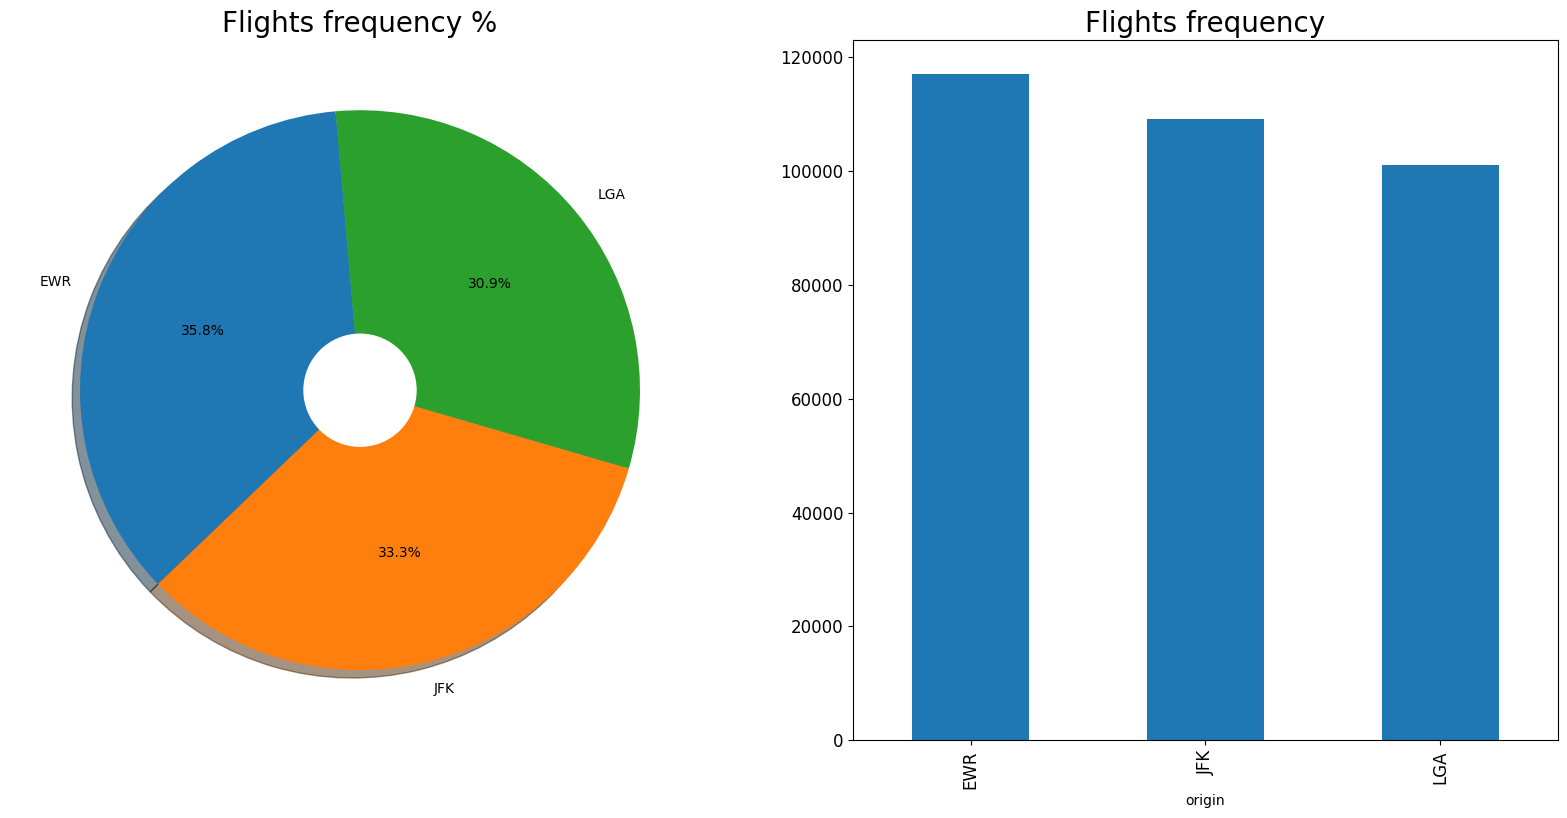

In [22]:
fig = plt.figure(figsize=[20, 20])
ax = fig.add_subplot(221)
ax.pie(buzAir, labeldistance=1.1, labels=buzAir.index, startangle=95, autopct='%1.1f%%', shadow=True)
ax.set_title("Flights frequency %", fontsize=20);
plt.gcf().gca().add_artist(plt.Circle( (0,0), 0.2, color='white'))

ax2 = fig.add_subplot(222)
ax2.set_title("Flights frequency", fontsize=20);
ax2.set_facecolor('white')
buzAir.plot(kind='bar', ax=ax2,  legend=False, fontsize=12)
plt.show()

In [23]:
buzMonth = df.groupby(['month'])['month'].count()
buzMonth

month
1     26398
2     23611
3     27902
4     27564
5     28128
6     27075
7     28293
8     28756
9     27010
10    28618
11    26971
12    27020
Name: month, dtype: int64

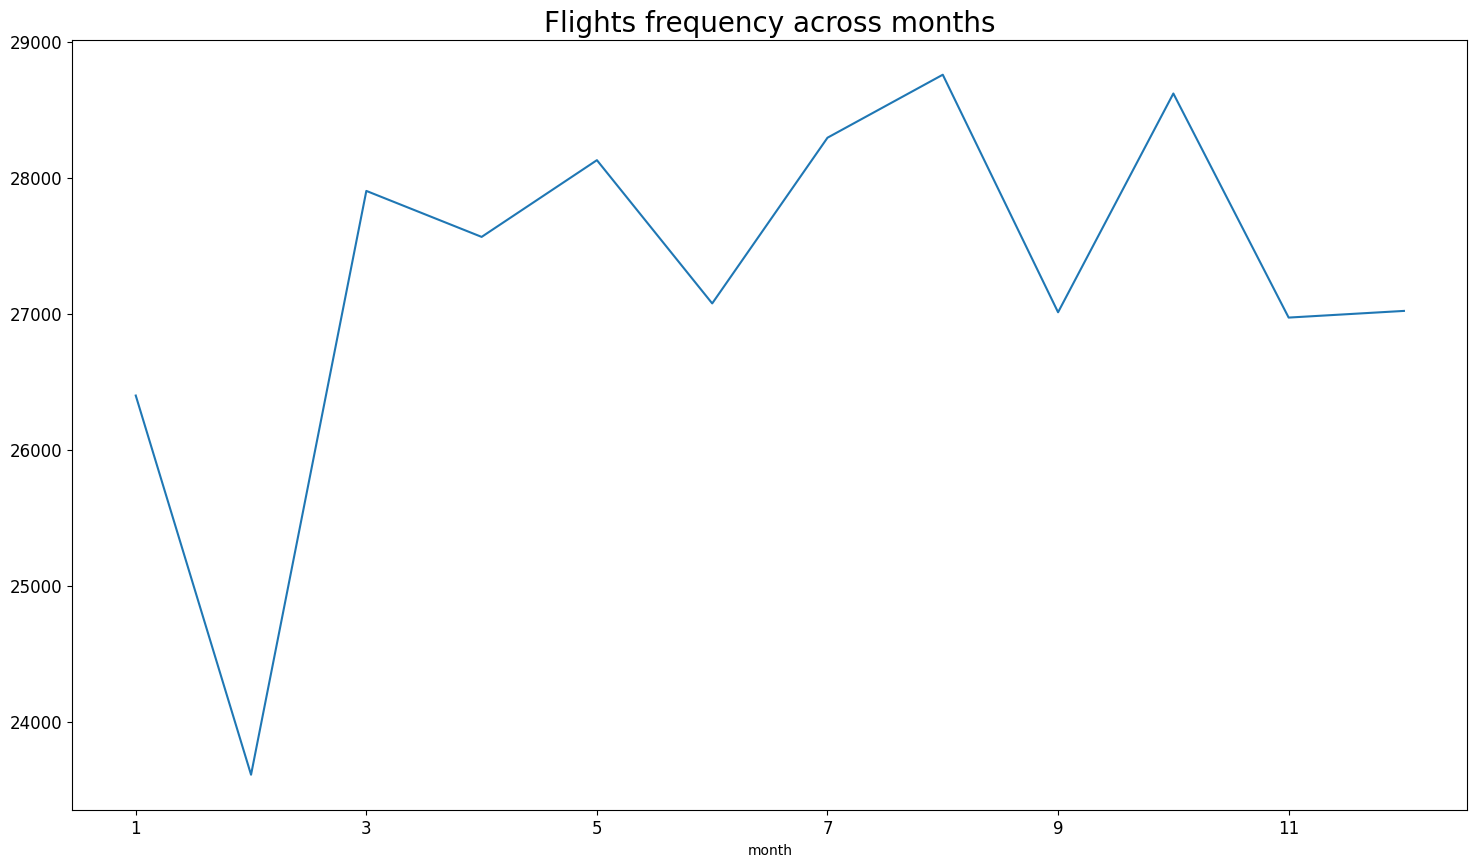

In [24]:
fig = plt.figure(figsize=[18, 10])
ax = fig.add_subplot(111)
ax.set_facecolor('white')
ax.set_title("Flights frequency across months", fontsize=20);
buzMonth.plot(ax=ax,  legend=False, fontsize=12)
plt.show()

In [25]:
depStatus = df.groupby('dep_status')['dep_status'].count()
arrStatus = df.groupby('arr_status')['arr_status'].count()
print(depStatus)
print()
print(arrStatus)

dep_status
Canceled         0
Late        127745
OnTime      199601
Name: dep_status, dtype: int64

arr_status
Canceled         0
Late        133004
OnTime      194342
Name: arr_status, dtype: int64


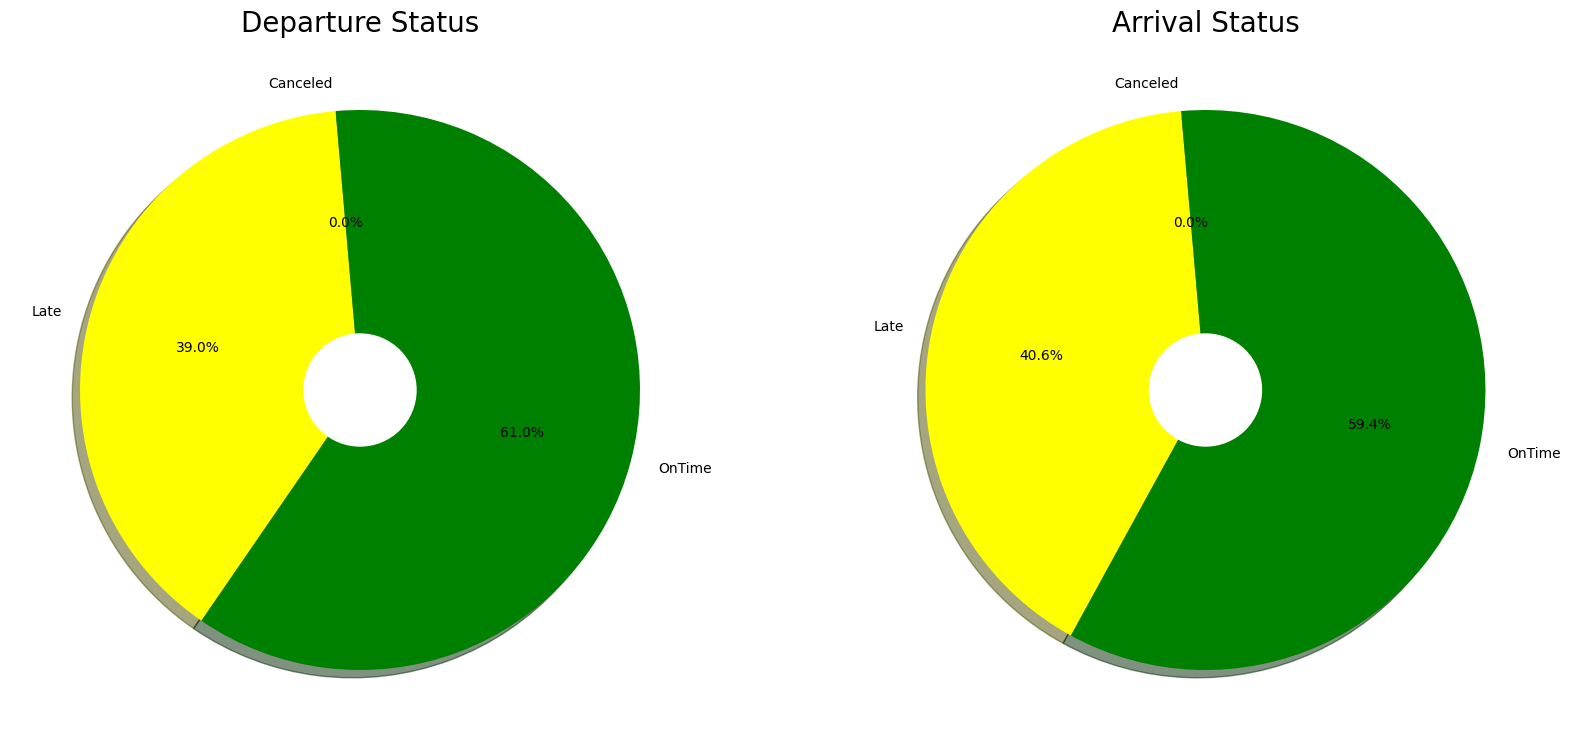

In [26]:
fig = plt.figure(figsize=[20, 20])
ax = fig.add_subplot(221)
ax.pie(depStatus, labeldistance=1.1, labels=depStatus.index, startangle=95, autopct='%1.1f%%', shadow=True, colors=['red','yellow','green'])
ax.set_title("Departure Status", fontsize=20);
plt.gcf().gca().add_artist(plt.Circle( (0,0), 0.2, color='white'))

ax2 = fig.add_subplot(222)
ax2.pie(arrStatus, labeldistance=1.1, labels=arrStatus.index, startangle=95, autopct='%1.1f%%', shadow=True, colors=['red','yellow','green'])
ax2.set_title("Arrival Status", fontsize=20);
plt.gcf().gca().add_artist(plt.Circle( (0,0), 0.2, color='white'))
plt.show()

In [27]:
depAir = df.loc[df['dep_status'] == 'Late'].groupby(['origin','dep_status'])['dep_status'].count().unstack('dep_status')
depAir

dep_status,Canceled,Late,OnTime
origin,,,
EWR,0,52414,0
JFK,0,41833,0
LGA,0,33498,0


In [29]:
arrAir = df.loc[df['arr_status'] == 'Late'].groupby(['origin','arr_status'])['arr_status'].count().unstack('arr_status')
arrAir

arr_status,Canceled,Late,OnTime
origin,,,
EWR,0,50099,0
JFK,0,42885,0
LGA,0,40020,0


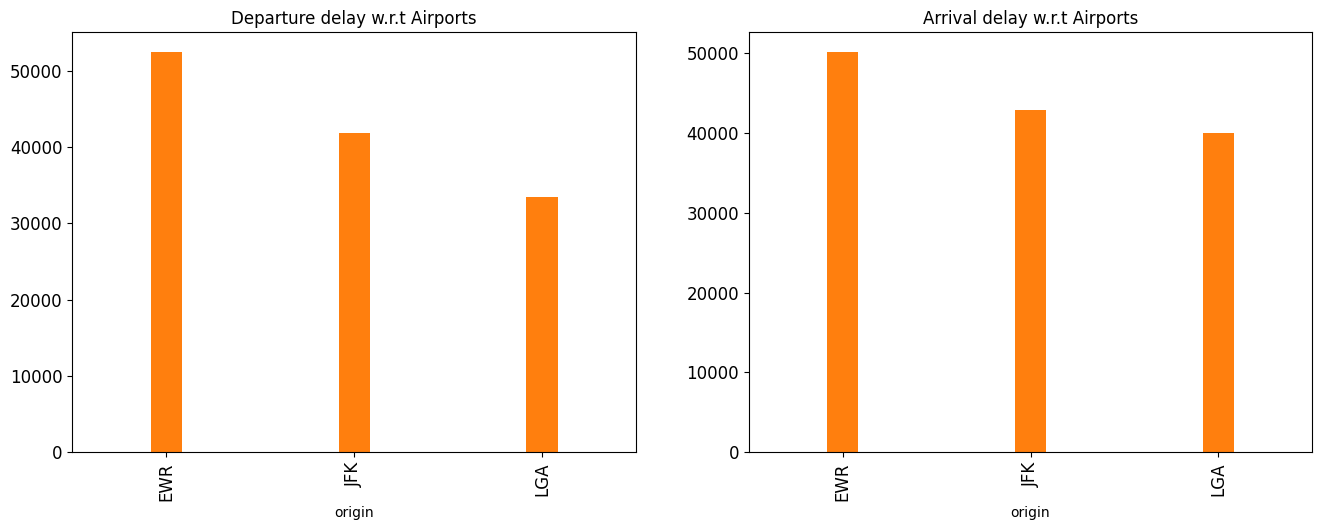

In [30]:
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(221)
depAir.plot(kind='bar', ax=ax, title ="Departure delay w.r.t Airports",  legend=False, fontsize=12)
ax2 = fig.add_subplot(222)
ax.set_facecolor('white')
ax2.set_facecolor('white')
arrAir.plot(kind='bar', ax=ax2, title ="Arrival delay w.r.t Airports",  legend=False, fontsize=12)
plt.show()

In [32]:
depAirPer = df.groupby('origin')['origin'].count().reset_index(name='total')
delayedFlights = df.loc[df['dep_status'] == 'Late'].groupby(['origin','dep_status'])['dep_status'].count().unstack('dep_status')
depAirPer['late'] = delayedFlights['Late'].values
depAirPer['percentage'] = (depAirPer['late']/depAirPer['total'])*100
depAirPer.set_index('origin', inplace=True)
depAirPer

,total,late,percentage
origin,,,
EWR,117127,52414,44.749716
JFK,109079,41833,38.351103
LGA,101140,33498,33.120427


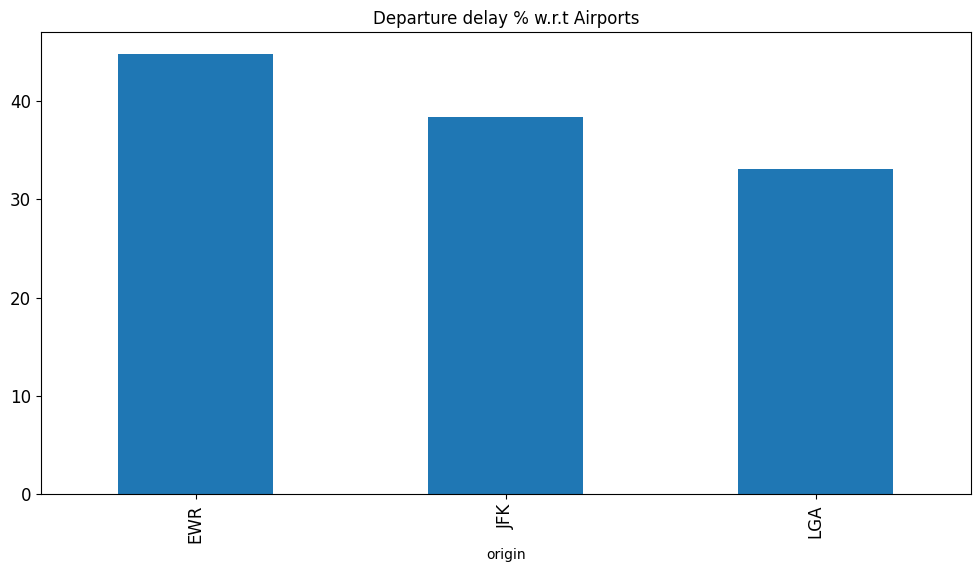

In [33]:
depAirPer['percentage'].plot(kind='bar', figsize=[12,6], title ="Departure delay % w.r.t Airports",  legend=False, fontsize=12)
plt.gca().set_facecolor('white')
plt.show()